# K-Means Clustering Algorithm

In this question, we are using the K-Means clustering Algorithm to perform colour segmentation on the image,ie, we will assign all the pixels that have a similar colour to the same image segment.

First we are going to import the necessary libraries and prepare the image.

In [1]:
# Importing required libraries 

from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# Reading the image

image = imread('image.jpg')

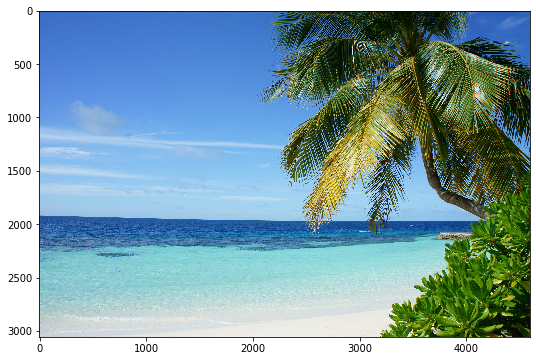

In [3]:
plt.figure(figsize=(12,6))
plt.imshow(image)

In [4]:
image.shape

(3056, 4592, 3)

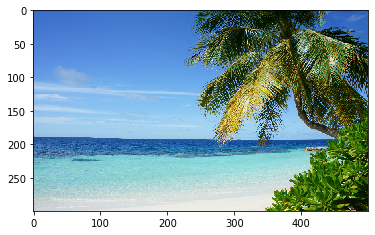

In [5]:
# Resizing the image

image = cv2.resize(image,dsize=(500,300))
plt.imshow(image)

In [6]:
image.shape

(300, 500, 3)

In [7]:
image

array([[[ 57, 105, 195],
        [ 59, 105, 193],
        [ 56, 104, 194],
        ...,
        [ 52, 102, 182],
        [ 49, 101, 182],
        [ 52, 100, 181]],

       [[ 56, 103, 193],
        [ 55, 107, 193],
        [ 60, 107, 195],
        ...,
        [ 52, 101, 181],
        [ 51, 102, 183],
        [ 52, 100, 182]],

       [[ 59, 106, 194],
        [ 61, 108, 196],
        [ 56, 106, 195],
        ...,
        [ 49, 104, 184],
        [ 49, 104, 184],
        [ 52, 103, 182]],

       ...,

       [[203, 205, 202],
        [199, 207, 209],
        [196, 202, 202],
        ...,
        [ 11,  39,   0],
        [ 31,  71,   2],
        [ 31,  71,   0]],

       [[204, 207, 212],
        [209, 209, 216],
        [216, 217, 222],
        ...,
        [ 18,  46,   1],
        [ 27,  56,   0],
        [ 35,  70,   2]],

       [[195, 203, 207],
        [193, 204, 209],
        [195, 204, 209],
        ...,
        [ 20,  47,   2],
        [ 18,  48,   0],
        [ 32,  68,   2]]

These values seen above all represent pixels and we are going to scale this so that all pixels have a value between 0 and 1.

In [8]:
# Scaling pixel values

image = image/255.0

In [9]:
image

array([[[0.22352941, 0.41176471, 0.76470588],
        [0.23137255, 0.41176471, 0.75686275],
        [0.21960784, 0.40784314, 0.76078431],
        ...,
        [0.20392157, 0.4       , 0.71372549],
        [0.19215686, 0.39607843, 0.71372549],
        [0.20392157, 0.39215686, 0.70980392]],

       [[0.21960784, 0.40392157, 0.75686275],
        [0.21568627, 0.41960784, 0.75686275],
        [0.23529412, 0.41960784, 0.76470588],
        ...,
        [0.20392157, 0.39607843, 0.70980392],
        [0.2       , 0.4       , 0.71764706],
        [0.20392157, 0.39215686, 0.71372549]],

       [[0.23137255, 0.41568627, 0.76078431],
        [0.23921569, 0.42352941, 0.76862745],
        [0.21960784, 0.41568627, 0.76470588],
        ...,
        [0.19215686, 0.40784314, 0.72156863],
        [0.19215686, 0.40784314, 0.72156863],
        [0.20392157, 0.40392157, 0.71372549]],

       ...,

       [[0.79607843, 0.80392157, 0.79215686],
        [0.78039216, 0.81176471, 0.81960784],
        [0.76862745, 0

Preparing X so that it can be fitted in our model.

In [10]:
X = image.reshape(-1,3)
X.shape

(150000, 3)

In [11]:
X

array([[0.22352941, 0.41176471, 0.76470588],
       [0.23137255, 0.41176471, 0.75686275],
       [0.21960784, 0.40784314, 0.76078431],
       ...,
       [0.07843137, 0.18431373, 0.00784314],
       [0.07058824, 0.18823529, 0.        ],
       [0.1254902 , 0.26666667, 0.00784314]])

## Building KMeans class from scratch

The main steps that we need to keep in mind for coding up the k-Means clustering algorithm is:

1. Randomly assign centroids to start things up.

2. Based on those centroids (and an observation’s distance from it), assign each observation to a cluster.

3. Calculate the mean coordinates of each cluster; these are our new centroids.

4. Reassign clusters based on new centroids.

5. Keep repeating steps 3 and 4 until convergence. 

In [12]:
# Creating a function that returns the euclidean distance between 2 points

def euclidean_distance (x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [13]:
#Creating KMeans class

class KMeans:
    def __init__(self, K=2, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        
        # list of sample indices for each cluster
        self.cluster = [[] for _ in range(self.K)]
        # mean feature vector (the centres) for each cluster
        self.centroids = []
    
    def fit(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        #initialize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        # optimization
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids): 
                break
        #return centroids and cluster labels
        return (self.centroids,self._get_cluster_labels(self.clusters))
    
    def _get_cluster_labels(self,clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
        
    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
    
    def _get_centroids(self,clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K,self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster],axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self,centroids_old,centroids):
        # distances between each old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i],centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
         

## Using this clustering algorithm on the image for varying values of k

### k = 2

In [14]:
%%time

# Fitting the image into the algorithm in order to get the centroids and labels

k = KMeans(K = 2, max_iters=150)
cluster_centres,labels = k.fit(X)

CPU times: user 31.5 s, sys: 722 ms, total: 32.3 s
Wall time: 31.7 s


In [15]:
labels = labels.astype(int)

In [16]:
img_seg = cluster_centres[labels]
img_seg

array([[0.52372683, 0.70360532, 0.83729281],
       [0.52372683, 0.70360532, 0.83729281],
       [0.52372683, 0.70360532, 0.83729281],
       ...,
       [0.20111582, 0.29589675, 0.15043632],
       [0.20111582, 0.29589675, 0.15043632],
       [0.20111582, 0.29589675, 0.15043632]])

In [17]:
img_seg = img_seg.reshape(image.shape)

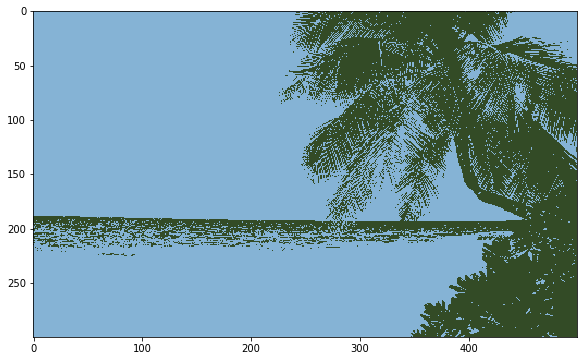

In [18]:
plt.figure(figsize=(12,6))
plt.imshow(img_seg)

### k = 3

In [19]:
%%time

# Fitting the image into the algorithm in order to get the centroids and labels

k = KMeans(K = 3, max_iters=150)
cluster_centres,labels = k.fit(X)

CPU times: user 57 s, sys: 1.24 s, total: 58.2 s
Wall time: 57.3 s


In [20]:
labels = labels.astype(int)

In [21]:
img_seg = cluster_centres[labels]
img_seg

array([[0.28464919, 0.49999978, 0.76256323],
       [0.28464919, 0.49999978, 0.76256323],
       [0.28464919, 0.49999978, 0.76256323],
       ...,
       [0.20856546, 0.28281848, 0.07512456],
       [0.20856546, 0.28281848, 0.07512456],
       [0.20856546, 0.28281848, 0.07512456]])

In [22]:
img_seg = img_seg.reshape(image.shape)

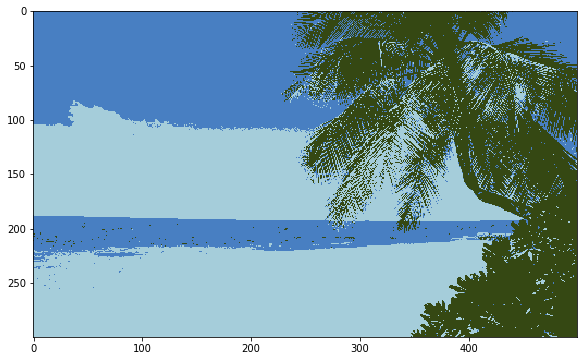

In [23]:
plt.figure(figsize=(12,6))
plt.imshow(img_seg)

### k = 4

In [24]:
%%time

# Fitting the image into the algorithm in order to get the centroids and labels

k = KMeans(K = 4, max_iters=150)
cluster_centres,labels = k.fit(X)

CPU times: user 1min 38s, sys: 2.53 s, total: 1min 40s
Wall time: 1min 38s


In [25]:
labels = labels.astype(int)

In [26]:
img_seg = cluster_centres[labels]
img_seg

array([[0.2704442 , 0.48268479, 0.74630756],
       [0.2704442 , 0.48268479, 0.74630756],
       [0.2704442 , 0.48268479, 0.74630756],
       ...,
       [0.20574127, 0.28025842, 0.07246423],
       [0.20574127, 0.28025842, 0.07246423],
       [0.20574127, 0.28025842, 0.07246423]])

In [27]:
img_seg = img_seg.reshape(image.shape)

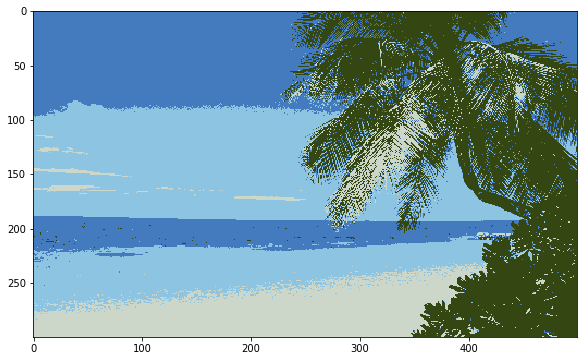

In [28]:
plt.figure(figsize=(12,6))
plt.imshow(img_seg)

### k = 5

In [29]:
%%time

# Fitting the image into the algorithm in order to get the centroids and labels

k = KMeans(K = 5, max_iters=150)
cluster_centres,labels = k.fit(X)

CPU times: user 2min 4s, sys: 3.92 s, total: 2min 8s
Wall time: 2min 5s


In [30]:
labels = labels.astype(int)

In [31]:
img_seg = cluster_centres[labels]
img_seg

array([[0.26285226, 0.47990717, 0.75921541],
       [0.26285226, 0.47990717, 0.75921541],
       [0.26285226, 0.47990717, 0.75921541],
       ...,
       [0.12917269, 0.20823977, 0.05081695],
       [0.12917269, 0.20823977, 0.05081695],
       [0.12917269, 0.20823977, 0.05081695]])

In [32]:
img_seg = img_seg.reshape(image.shape)

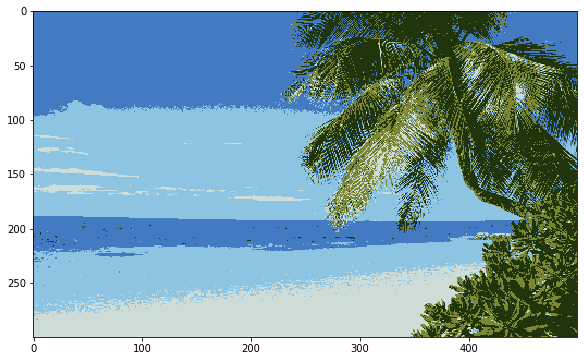

In [33]:
plt.figure(figsize=(12,6))
plt.imshow(img_seg)

### k = 6

In [34]:
%%time

# Fitting the image into the algorithm in order to get the centroids and labels

k = KMeans(K = 6, max_iters=150)
cluster_centres,labels = k.fit(X)

CPU times: user 3min 19s, sys: 6.47 s, total: 3min 25s
Wall time: 3min 20s


In [35]:
labels = labels.astype(int)

In [36]:
img_seg = cluster_centres[labels]
img_seg

array([[0.17075701, 0.38488193, 0.60590155],
       [0.17075701, 0.38488193, 0.60590155],
       [0.17075701, 0.38488193, 0.60590155],
       ...,
       [0.13021001, 0.20733882, 0.04302892],
       [0.13021001, 0.20733882, 0.04302892],
       [0.13021001, 0.20733882, 0.04302892]])

In [37]:
img_seg = img_seg.reshape(image.shape)

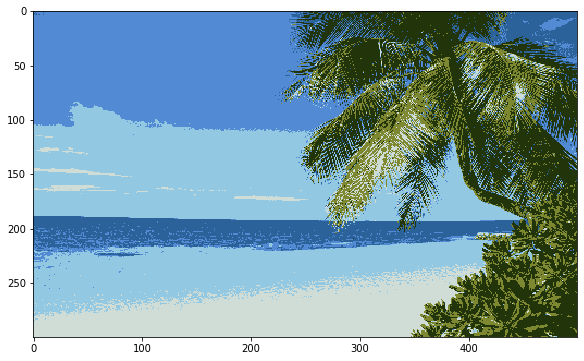

In [38]:
plt.figure(figsize=(12,6))
plt.imshow(img_seg)